# 2 (c)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

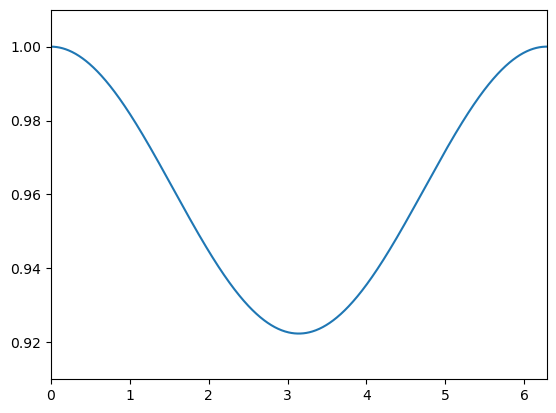

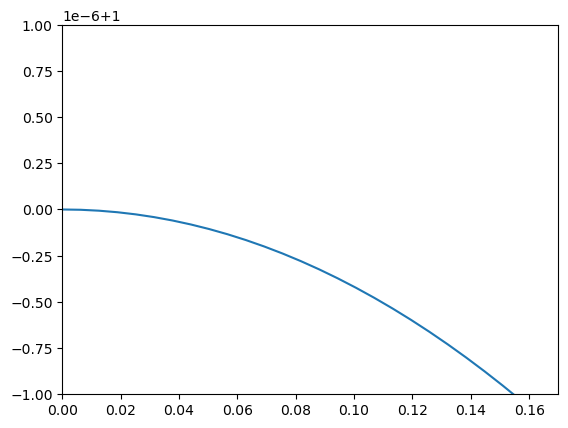

In [5]:
nu = 0.01
x = np.linspace(0, 2*np.pi, 1000)
A = np.abs(1 - nu*(1 - np.exp(-1j*x)))**2

plt.figure()
plt.plot(x, A)
plt.xlim(0, 2*np.pi) 
plt.ylim(0.91, 1.01)

plt.figure()
plt.plot(x, A)
plt.xlim(0, 0.17)
plt.ylim(1 - 1e-6, 1 + 1e-6)

plt.show()


# 2d-R(n)

In [8]:
# Define parameters
N = 40  # Number of grid points
h = 2 * np.pi / N  # Grid spacing
shift_factor = 0.001  # Shift factor per timestep

# Simulate the solution
u_list = []

for n in range(10001):
    # Calculate the current shift value
    shift = n * shift_factor

    # Create the initial condition with the adjusted shift
    u = np.exp(2 * np.sin(np.linspace(0, 2 * np.pi, N) + shift))

    # Update the solution using the numerical scheme
    nu = 1e-2  # Viscosity
    a = np.zeros(N)
    for j in range(1, N):
        a[j] = (1 - 2 * nu * h ** 2) * u[j] + nu * h ** 2 * (4 * u[j - 1] - u[j - 2])

    # Periodic boundary conditions
    a[0] = (1 - 2 * nu * h ** 2) * u[0] + nu * h ** 2 * (4 * u[-1] - u[-2])

    u = a.copy()

    # Store the solution for plotting
    u_list.append(u.copy())

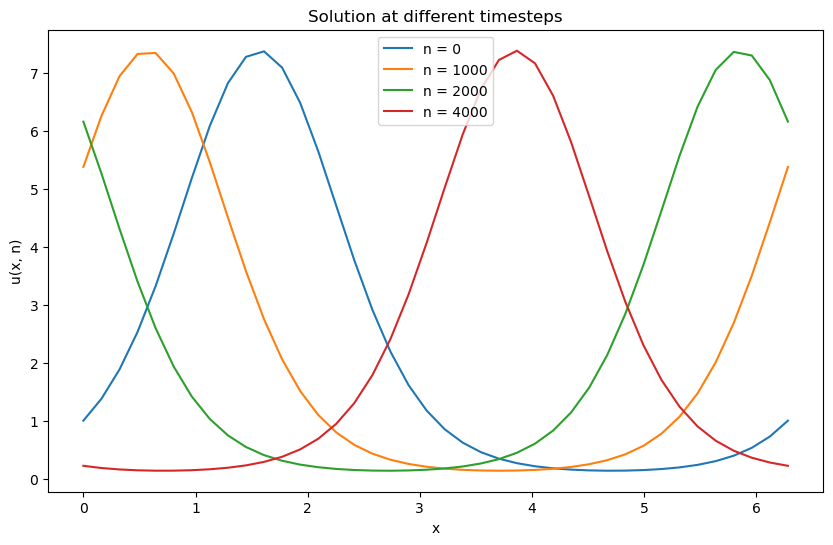

In [9]:
# Plot the solution at different timesteps
plt.figure(figsize=(10, 6))
for n in [0, 1000, 2000, 4000]:
    plt.plot(np.linspace(0, 2 * np.pi, N), u_list[n], label=f"n = {n}")

plt.xlabel("x")
plt.ylabel("u(x, n)")
plt.title("Solution at different timesteps")
plt.legend()
plt.show()